In [1]:
#importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#Loading The DataSet into the Notebook
df=pd.read_csv("/content/portu_banking_final.csv")


In [2]:
#Checking the Head
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
#total No. of Rows and Columns
df.shape

(41188, 21)

In [4]:
#information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
df.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?

In [6]:
#There are Two Types of Values in Y columns.
#(1,0) 1 is for the person Subscribed and 0 is for the person 
#who did not subscribe 
df['y'].unique()

array([0, 1])

In [7]:
#Checking The Total Number Of People Subscribed
sub=df[df['y']==0].value_counts()
total_num_sub=print("Total Number of People Subscribed: ",len(sub))

Total Number of People Subscribed:  36539


In [8]:
#checking the Tital Number of People who didn't Subscribed
nsub=df[df['y']==1].value_counts()
total_num_nsub=print("Total Number of People Not Subscribed :",len(nsub))

Total Number of People Not Subscribed : 4639


In [9]:
#checking the ratio of Two Classes
ratio=len(sub)/len(nsub)
print(ratio)

7.876482000431127


It is clear From The Ration that both the classes are not balanced , No. of Subscribed People is 7.87 times Greater than Number of people who did not Subscribed

--------------------------------------------------------------------------------------------------------------------------------------


# **Section 2 : Data Cleaning**

**Part I : Get the dtypes of all the columns of our dataset**

In [10]:
df.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Exploring The Data of each Column

In [11]:
#Exploring age Column 
age=df['age'].unique()
print(age)
print("*"*100)
print("As Per UCI datatype of Age Should be  numeric(means int or Float) but in database it is Object Datatype")


['44' '53' '28' '39' '55' '30' '37' '36' '27' '34' '41' '33' '26' '52'
 '35' '40' '32' '49' '38' '47' '46' '29' '54' '42' '72' '48' '43' '56'
 '31' '24' '68' '59' '50' '45' '35-30' '25' '57' '63' '58' '60' '30-35'
 '64' '51' '23' '20' '74' '80' '61' '25-30' '62' '75' '21' '82' '77'
 '18-25' '30-32' '70' '50-55' '76' '73' '66' '22' '71' '19' '79' '88' '65'
 '67' '81' '18' '84' '69' '98' '85' '83' '78' '92' '45-50' '20-25' '20-40'
 '35-40' '86' '94' '17' '91' '89' '87' '95' '30-40' 56 39 30 53 37 22 45
 31 24 50 58 33 27 28 32 51 41 49 43 44 35 29 26 57 25 42 48 46 67 38 34
 54 40 23 47 62 75 55 36 52 59 78 70 60 20 66 61 21 88 18 68 71 73 80 79
 63 76 83 65 19 86 17 72 69 81 64 77 74 85 82]
****************************************************************************************************
As Per UCI datatype of Age Should be  numeric(means int or Float) but in database it is Object Datatype


In [12]:
df['age'].replace({'35-30':32.5,'30-35':32.5,'25-30':27.5,'18-25':21.5,'30-32':31,'50-55':52.5,'45-50':47.5,'20-25':22.5,'20-40':30,'35-40':37.5,'30-40':35},inplace=True)

In [13]:
age=df['age'].unique()
print(age)

['44' '53' '28' '39' '55' '30' '37' '36' '27' '34' '41' '33' '26' '52'
 '35' '40' '32' '49' '38' '47' '46' '29' '54' '42' '72' '48' '43' '56'
 '31' '24' '68' '59' '50' '45' 32.5 '25' '57' '63' '58' '60' '64' '51'
 '23' '20' '74' '80' '61' 27.5 '62' '75' '21' '82' '77' 21.5 31 '70' 52.5
 '76' '73' '66' '22' '71' '19' '79' '88' '65' '67' '81' '18' '84' '69'
 '98' '85' '83' '78' '92' 47.5 22.5 30 37.5 '86' '94' '17' '91' '89' '87'
 '95' 35 56 39 53 37 22 45 24 50 58 33 27 28 32 51 41 49 43 44 29 26 57 25
 42 48 46 67 38 34 54 40 23 47 62 75 55 36 52 59 78 70 60 20 66 61 21 88
 18 68 71 73 80 79 63 76 83 65 19 86 17 72 69 81 64 77 74 85 82]


In [14]:
#Exploring Job Column
job=df['job'].unique()
print(job)
print("*"*100)
print("Some of the Job Categories are repeated (like technician & TECHNICIAN)")


['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student' 'MANAGEMENT' 'RETIRED' 'STUDENT' 'ADMIN.' 'TECHNICIAN'
 'BLUE-COLLAR' 'HOUSEMAID' 'SERVICES' 'UNKNOWN']
****************************************************************************************************
Some of the Job Categories are repeated (like technician & TECHNICIAN)


In [15]:
#Making The Same Categories (Spelled Different) as one 
df['job'].replace({"technician":"TECHNICIAN","blue-collar":"BLUE-COLLAR","management":"MANAGEMENT","services":"SERVICES","retired":"RETIRED","admin.":"ADMIN.","housemaid":"HOUSEMAID","unknown":"UNKNOWN","student":"STUDENT"},inplace=True)

In [16]:
job=df['job'].unique()
print(job)

['BLUE-COLLAR' 'TECHNICIAN' 'MANAGEMENT' 'SERVICES' 'RETIRED' 'ADMIN.'
 'HOUSEMAID' 'unemployed' 'entrepreneur' 'self-employed' 'UNKNOWN'
 'STUDENT']


In [17]:
#Exploring the marital Column
marital=df['marital'].unique()
print(marital)
print("*"*100)
print("Some of the categories are Repeated (like Divorced & D")

['married' 'single' 'divorced' 'D' 'unknown' 'S' 'M']
****************************************************************************************************
Some of the categories are Repeated (like Divorced & D


In [20]:
df['marital'].replace({"M":"married","S":"single","D":"divorced","unknown":"married"},inplace=True)

In [21]:
marital=df['marital'].unique()
print(marital)

['married' 'single' 'divorced']


In [22]:
#exploring the education  Column
education=df['education'].unique()
print(education)
print("*"*100)
print("Unknown Category ")

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'basic-6y' 'basic-9y' 'basic-4y'
 'illiterate']
****************************************************************************************************
Unknown Category 


In [23]:
df['education'].replace({'basic-6y':'basic.6y','basic-9y':'basic.9y','basic-4y':'basic.4y'},inplace=True)

In [24]:
education=df['education'].unique()
print(education)
print("*"*100)
print("Unknown Category ")

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
****************************************************************************************************
Unknown Category 


In [25]:
#Exploring Default categories
default=df['default'].unique()
print(default)
print("*"*100)
print("Unknown Category")

['unknown' 'no' 'yes']
****************************************************************************************************
Unknown Category


# Section III : Exploring data with Group by

In [26]:
subscribe_data=df.groupby('y').mean()
subscribe_data.head()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [27]:
job_data=df.groupby('job').mean()
job_data.head()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
ADMIN.,254.312128,2.623489,956.046344,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
BLUE-COLLAR,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
HOUSEMAID,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
MANAGEMENT,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
RETIRED,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326


In [28]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [29]:
marital_data=df.groupby('marital').mean()
marital_data.head()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
divorced,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
single,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [30]:
education_data=df.groupby('education').mean()
education_data.head()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic.4y,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222


In [31]:
df['job'].unique()

array(['BLUE-COLLAR', 'TECHNICIAN', 'MANAGEMENT', 'SERVICES', 'RETIRED',
       'ADMIN.', 'HOUSEMAID', 'unemployed', 'entrepreneur',
       'self-employed', 'UNKNOWN', 'STUDENT'], dtype=object)

In [32]:
marital_data.head()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
divorced,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
single,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [33]:
education_data.head()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic.4y,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222


In [ ]:
#sns.pairplot(df,hue='y')

In [34]:
x=df['age'].unique()
x

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 32.5, '25', '57', '63', '58', '60', '64', '51', '23', '20',
       '74', '80', '61', 27.5, '62', '75', '21', '82', '77', 21.5, 31,
       '70', 52.5, '76', '73', '66', '22', '71', '19', '79', '88', '65',
       '67', '81', '18', '84', '69', '98', '85', '83', '78', '92', 47.5,
       22.5, 30, 37.5, '86', '94', '17', '91', '89', '87', '95', 35, 56,
       39, 53, 37, 22, 45, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44,
       29, 26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55,
       36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79,
       63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [35]:
df['age'].astype('int64')

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [36]:
pd.to_numeric(df['age'])

0        44.0
1        53.0
2        28.0
3        39.0
4        55.0
         ... 
41183    59.0
41184    31.0
41185    42.0
41186    48.0
41187    25.0
Name: age, Length: 41188, dtype: float64

In [37]:
df['age']=df['age'].astype(int)

In [38]:
df['age'].dtypes

dtype('int64')

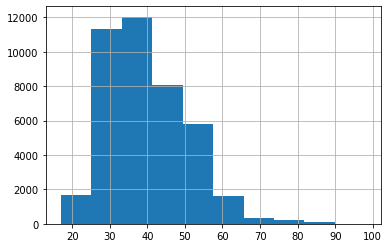

In [39]:
df['age'].hist()

# Section IV : Categorical Variable Encoding

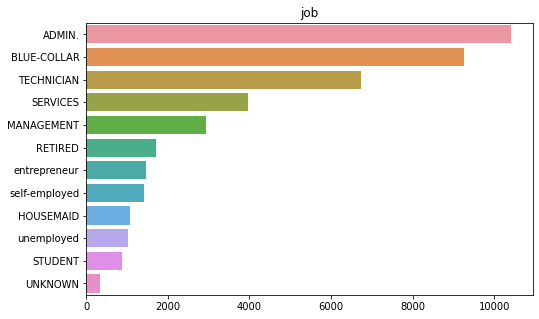

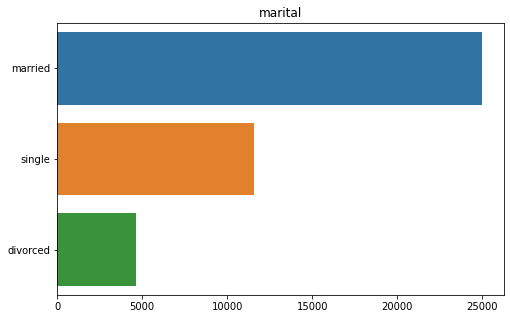

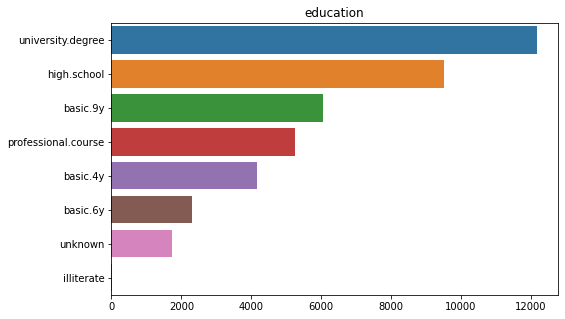

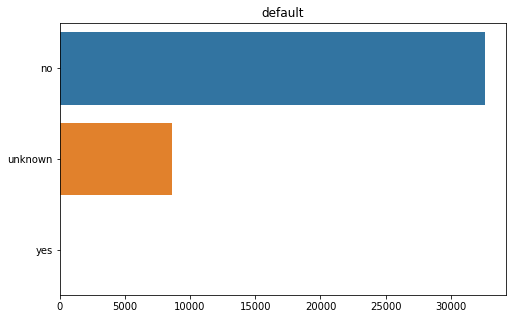

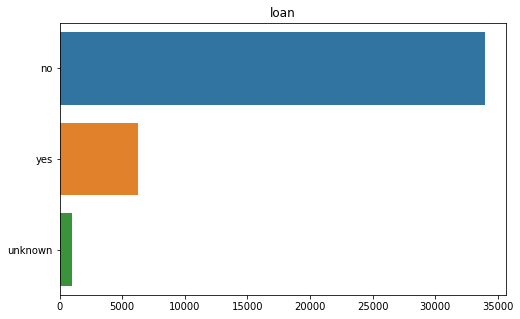

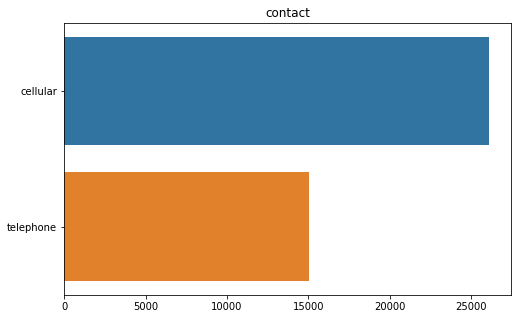

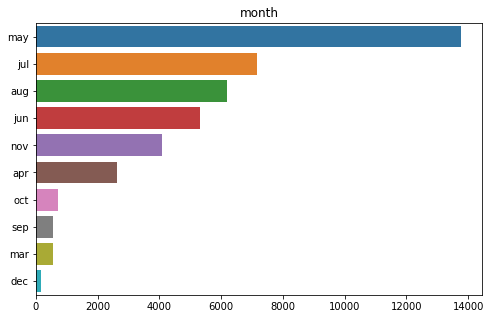

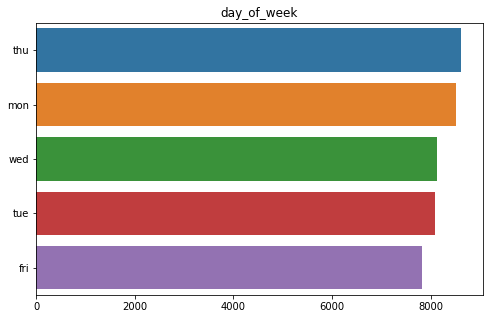

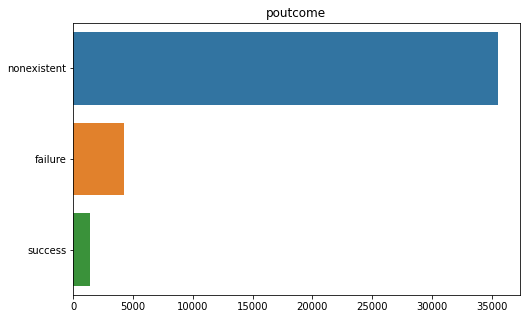

In [40]:
cat_var = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in cat_var:
  plt.figure(figsize=(8,5))
  sns.barplot(df[col].value_counts().values,df[col].value_counts().index)
  plt.title(col)
  plt.show()
  
  

# Logistic Regression

CHeck for Numerical values 

In [45]:
num_data=df.select_dtypes(include=["int64","float64"])
#num_data2=df.select_dtypes(include="float64")
#cat_data.drop('age',axis=1,inplace=True)
#print("categorical Values:",cat_data.head())

In [ ]:
num_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1


Check for Categorical Value

In [43]:
df_cat=df.select_dtypes(include='object')
dummies_cat=pd.get_dummies(df_cat,drop_first=True)

In [46]:
df1=pd.concat([num_data,dummies_cat],axis='columns')

In [47]:
df1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_BLUE-COLLAR,job_HOUSEMAID,job_MANAGEMENT,job_RETIRED,job_SERVICES,job_STUDENT,job_TECHNICIAN,job_UNKNOWN,job_entrepreneur,job_self-employed,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
X=df1.iloc[:,:-1]
y=df1.loc[:,'y']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=5)

In [50]:
model=LogisticRegression(verbose=2)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [51]:
from sklearn.metrics import classification_report
predictions=model.predict(X_test)
print(predictions)
print()
print(classification_report(y_test,predictions))

[0 0 0 ... 0 1 0]

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7325
           1       0.75      0.56      0.64       913

    accuracy                           0.93      8238
   macro avg       0.85      0.77      0.80      8238
weighted avg       0.93      0.93      0.93      8238



Scoring and Metrics

In [52]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
print("The Accuracy of the Model",accuracy_score(y_test,predictions))

The Accuracy of the Model 0.93092983733916


In [53]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [54]:
#independent and dependent feature
X=df1.drop("y",axis=1)
y=df1.y

In [ ]:
#Oversampling

In [55]:
y_train.value_counts()

0    29223
1     3727
Name: y, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote,y_train_smote=smote.fit_sample(X_train,y_train)



In [57]:
from collections import Counter
print("Before SMOTE: ",Counter(y_train))
print("After SMOTE: ",Counter(y_train_smote))

Before SMOTE:  Counter({0: 29223, 1: 3727})
After SMOTE:  Counter({0: 29223, 1: 29223})


In [58]:
model=LogisticRegression(verbose=2)
model.fit(X_train_smote,y_train_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [59]:
from sklearn.metrics import classification_report
predictions=model.predict(X_test)
print(predictions)
print()
print(classification_report(y_test,predictions))

[0 0 0 ... 1 1 0]

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      7325
           1       0.58      0.95      0.72       913

    accuracy                           0.92      8238
   macro avg       0.79      0.93      0.84      8238
weighted avg       0.95      0.92      0.93      8238



In [60]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
print("The Accuracy of the Model",accuracy_score(y_test,predictions))

The Accuracy of the Model 0.9190337460548677


In [61]:
from sklearn.feature_selection import RFE


In [62]:
selector=RFE(model,n_features_to_select=5)
selector.fit(X_train_smote,y_train_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=2, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [63]:
print(selector.support_)

[False False False False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False  True False False
 False False False False]


In [64]:
features = X_train.columns[selector.get_support()]

In [65]:
cols=num_data.columns
print(cols)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [66]:
len(cols)

11

In [67]:
ncols=[]
for i in range(0,10):
  if selector.support_[i]==True:
    ncols= ncols + [cols[i]]

In [68]:
print(ncols)

['euribor3m']


In [69]:
#select=['campaign', 'previous', 'emp_var_rate', 'cons_price_idx', 'euribor3m']
X_new=df[['campaign', 'previous', 'emp_var_rate', 'cons_price_idx', 'euribor3m']]
y=df['y']


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,train_size=0.8)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
from sklearn.metrics import classification_report
predictions=model.predict(X_test)
print(predictions)
print()
print(classification_report(y_test,predictions))

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7323
           1       0.53      0.06      0.10       915

    accuracy                           0.89      8238
   macro avg       0.71      0.53      0.52      8238
weighted avg       0.85      0.89      0.85      8238



In [72]:
from sklearn.metrics import accuracy_score
print("The Accuracy of the Model",accuracy_score(y_test,predictions))

The Accuracy of the Model 0.8896576839038601


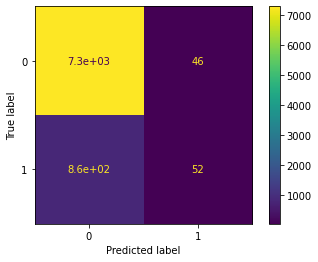

In [73]:
cf=plot_confusion_matrix(model,X_test,y_test)